# Regularized Linear Regression Project

### US county-level sociodemographic and health resource data (2018-2019)

- Sociodemographic and health resource data have been collected by county in the United States and we want to find out if there is any relationship between health resources and sociodemographic data. To do this, we need to set a target variable (health-related) to conduct the analysis.

In [60]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [61]:
# Dataset Shape Analysis

total_data.shape

(3140, 108)

In [62]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [63]:
# Dataset Info 

total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [64]:
# Get null and type info

pd.set_option('display.max_rows', None)

column_data = pd.DataFrame({
        'Non-Null Count': total_data.count(),
        'Null Count': total_data.isnull().sum(),
        'Data Type': total_data.dtypes
        })

column_data

,Non-Null Count,Null Count,Data Type
fips,3140,0,int64
TOT_POP,3140,0,int64
0-9,3140,0,int64
0-9 y/o % of total pop,3140,0,float64
19-Oct,3140,0,int64
10-19 y/o % of total pop,3140,0,float64
20-29,3140,0,int64
20-29 y/o % of total pop,3140,0,float64
30-39,3140,0,int64
30-39 y/o % of total pop,3140,0,float64


In [65]:
# Separate in 2 lists the numerical and categorical variables

cat_variables = total_data.select_dtypes(include=['object']).columns.tolist()
num_variables = total_data.select_dtypes(include=['number']).columns.tolist()

print("Categorical variables:", cat_variables)
print("Numerical variables:", num_variables)

Categorical variables: ['COUNTY_NAME', 'STATE_NAME']
Numerical variables: ['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 20

- There are many variables and we need to do one first selection. By reducing the number of columns, we can improve our model.

In [66]:
# Trimm the Categoric (String) 
total_data.drop(['COUNTY_NAME', 'STATE_NAME'], axis=1, inplace=True)

- Normalize the data -> Divide train and test -> Select the variables -> Join train and test -> Develop EDA with first selected data.

- Important remark: Only predictor variables should be scaled, never the target.

In [67]:
# Normalize the data

from sklearn.preprocessing import StandardScaler

# Select numerical columns (tarjet excluded)

num_variables = total_data.drop('Obesity_prevalence', axis=1).columns

scaler = StandardScaler()
norm_features = scaler.fit_transform(total_data[num_variables])

In [68]:
# Create a new dataset with numeric variables normalized and the target variable

total_data_scal = pd.DataFrame(norm_features, index = total_data.index, columns = num_variables)
total_data_scal['Obesity_prevalence'] = total_data['Obesity_prevalence']
total_data_scal.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,Obesity_prevalence
0,-1.940874,-0.145679,-0.142421,0.158006,-0.135556,0.573496,-0.153144,0.027610,-0.139384,0.588469,...,-0.063696,-0.071720,-0.089834,-0.129902,-0.609615,-0.582796,-0.669652,-0.147523,-1.082865,35.8
1,-1.940742,0.341296,0.287476,-0.242861,0.320383,-0.193107,0.183774,-0.469965,0.230620,-0.110300,...,-0.394103,-0.414900,-0.337677,0.376251,-0.433549,-0.393279,-0.343373,0.389791,-0.420704,29.7
2,-1.940610,-0.237785,-0.239429,-0.419441,-0.246181,-0.439718,-0.225971,0.272104,-0.218759,0.656538,...,2.432709,2.483064,2.317776,-0.183415,1.855312,1.880929,1.777443,-0.204321,0.903618,40.7
3,-1.940478,-0.245223,-0.246032,-0.426966,-0.254791,-0.609076,-0.230792,0.396168,-0.220555,1.264959,...,0.376846,0.423984,0.299632,-0.229096,-0.257483,-0.203761,-0.180233,-0.242100,-1.745026,38.7
4,-1.940346,-0.138966,-0.135053,0.186249,-0.137140,0.216679,-0.155888,-0.200808,-0.143570,0.088582,...,0.156575,0.195197,0.158008,-0.111247,-0.081417,-0.014244,-0.017093,-0.124105,-1.745026,34.0


In [69]:
from sklearn.model_selection import train_test_split

num_variables = total_data.drop('Obesity_prevalence', axis=1).columns

# We divide the dataset into training and test samples:

X = total_data_scal[num_variables]
y = total_data_scal['Obesity_prevalence']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
1292,-0.282189,-0.232556,-0.227731,0.106699,-0.234284,0.171904,-0.232951,-0.418879,-0.226353,-0.663894,...,-0.223516,0.229998,0.195197,0.299632,-0.218609,0.622848,0.554308,0.635465,-0.219329,0.903618
2302,0.773650,-0.158676,-0.178665,-0.747469,-0.180166,-0.813690,-0.188266,-0.724196,-0.175070,-0.786006,...,-0.110080,0.009727,-0.071720,0.051790,-0.131449,0.094650,-0.014244,0.146046,-0.130962,0.241457
761,-0.809910,-0.199114,-0.211128,-0.710138,-0.195138,0.469815,-0.166782,1.322078,-0.195036,-0.119547,...,-0.193106,-0.320679,-0.338638,-0.337677,-0.189197,-0.961748,-0.961830,-0.995931,-0.206391,-1.745026
2194,0.642281,-0.036595,-0.037734,0.124664,-0.017077,0.580483,-0.057986,0.102846,-0.052252,0.350862,...,-0.007077,-0.687797,-0.643687,-0.727143,-0.047515,-0.785681,-0.772313,-0.832792,-0.045054,-1.082865
1241,-0.288923,0.090839,0.094680,0.256631,0.101662,0.243136,0.056721,0.180943,0.042392,0.082720,...,0.265603,-0.210544,-0.147983,-0.231458,0.123040,-0.081417,-0.014244,-0.180233,0.132454,-0.420704


Important remark: Only predictor variables should be scaled, never the target.

In [70]:
# Feature Selection:

from sklearn.feature_selection import SelectKBest, f_regression

# KBest Selection for the best Features

k = int(len(X_train.columns) * 0.3)
selection_model = SelectKBest(score_func = f_regression, k = k)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,% Asian-alone,R_death_2018,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,...,Heart disease_Upper 95% CI,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI
0,-0.427173,-0.135940,0.108842,0.154941,-0.293986,0.055545,0.246196,0.161446,-0.172093,-0.050056,...,0.857050,0.940367,0.845366,0.980076,0.229998,0.195197,0.299632,0.622848,0.554308,0.635465
1,-0.386454,1.017714,-0.506607,1.962510,-0.421202,-0.026009,-0.023228,-0.123384,-0.503825,-0.410166,...,0.336239,0.343248,0.222683,0.406134,0.009727,-0.071720,0.051790,0.094650,-0.014244,0.146046
2,-0.179106,-0.433657,-0.411923,1.322909,-0.580221,-0.482712,-0.708012,-0.750012,0.140295,0.166408,...,-0.705384,0.044689,0.031088,-0.014757,-0.320679,-0.338638,-0.337677,-0.961748,-0.961830,-0.995931
3,-0.022810,-0.470872,-0.869564,-0.206573,0.289084,-0.874172,-0.966210,-1.034842,0.653104,0.711354,...,-0.497060,-0.424476,-0.352101,-0.435648,-0.687797,-0.643687,-0.727143,-0.785681,-0.772313,-0.832792
4,0.503757,-0.024296,-0.711757,0.293985,-0.039556,0.349140,0.728913,0.605782,-0.313113,-0.255265,...,-0.184573,0.215294,0.270582,0.214820,-0.210544,-0.147983,-0.231458,-0.081417,-0.014244,-0.180233


In [71]:

X_test_sel.head()

,% Asian-alone,R_death_2018,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,...,Heart disease_Upper 95% CI,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI
0,-0.323415,0.273421,0.661168,0.627690,-0.622626,0.120788,0.156388,0.104480,-0.242208,-0.320212,...,0.336239,0.300597,0.366379,0.214820,0.633829,0.729033,0.547474,0.798914,0.933342,0.798605
1,1.366977,-0.582516,-1.232521,-1.624819,1.126586,-0.988348,-1.078470,-1.069022,1.708852,1.873108,...,-1.226196,-1.320154,-1.310075,-1.353955,-1.091628,-1.024998,-1.081203,-1.137814,-1.151348,-1.159071
2,-0.411468,-0.210369,1.892066,1.169960,-1.555540,3.024116,2.053578,2.121081,-1.635154,-1.585306,...,2.419484,3.286191,3.431897,3.237582,2.212438,2.254277,2.176151,1.679246,1.501894,1.614304
3,-0.230011,-0.917448,-0.648634,0.488646,0.119464,-0.727375,-0.842724,-0.841157,0.681725,0.695835,...,-0.601222,-0.040614,-0.112608,-0.014757,-0.908068,-0.948736,-0.904173,-0.785681,-0.772313,-0.832792
4,1.080445,-1.066306,-0.901126,-1.527489,1.306808,-0.042320,-0.752916,-0.772798,0.682804,0.786157,...,-1.330358,-1.277503,-1.262177,-1.277430,-1.385322,-1.330047,-1.399857,-1.137814,-1.151348,-1.159071


In [72]:
# Combine and save datasets:

X_train_sel['Obesity_prevalence'] = list(y_train)
X_test_sel['Obesity_prevalence'] = list(y_test)

X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [73]:
# Concatenate and save the new dataset:

combo_data = pd.concat([X_train_sel, X_test_sel])

# Save dataset:

combo_data.to_csv('/workspaces/machine-learning-regularized-linear-regression-Juli-MM/data/raw/total_data.csv', index=False)

combo_data.head()


,% Asian-alone,R_death_2018,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,...,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,Obesity_prevalence
0,-0.427173,-0.135940,0.108842,0.154941,-0.293986,0.055545,0.246196,0.161446,-0.172093,-0.050056,...,0.940367,0.845366,0.980076,0.229998,0.195197,0.299632,0.622848,0.554308,0.635465,38.6
1,-0.386454,1.017714,-0.506607,1.962510,-0.421202,-0.026009,-0.023228,-0.123384,-0.503825,-0.410166,...,0.343248,0.222683,0.406134,0.009727,-0.071720,0.051790,0.094650,-0.014244,0.146046,33.2
2,-0.179106,-0.433657,-0.411923,1.322909,-0.580221,-0.482712,-0.708012,-0.750012,0.140295,0.166408,...,0.044689,0.031088,-0.014757,-0.320679,-0.338638,-0.337677,-0.961748,-0.961830,-0.995931,33.7
3,-0.022810,-0.470872,-0.869564,-0.206573,0.289084,-0.874172,-0.966210,-1.034842,0.653104,0.711354,...,-0.424476,-0.352101,-0.435648,-0.687797,-0.643687,-0.727143,-0.785681,-0.772313,-0.832792,36.5
4,0.503757,-0.024296,-0.711757,0.293985,-0.039556,0.349140,0.728913,0.605782,-0.313113,-0.255265,...,0.215294,0.270582,0.214820,-0.210544,-0.147983,-0.231458,-0.081417,-0.014244,-0.180233,37.5


In [74]:
# EDA with treated dataset:

# Dataset Shape Analysis

combo_data.shape


(3140, 32)

In [75]:
# Dataset info:

print(combo_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3140 entries, 0 to 627
Data columns (total 32 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   % Asian-alone                                                           3140 non-null   float64
 1   R_death_2018                                                            3140 non-null   float64
 2   Percent of adults with less than a high school diploma 2014-18          3140 non-null   float64
 3   Percent of adults with a high school diploma only 2014-18               3140 non-null   float64
 4   Percent of adults with a bachelor's degree or higher 2014-18            3140 non-null   float64
 5   PCTPOVALL_2018                                                          3140 non-null   float64
 6   PCTPOV017_2018                                                          3140 non-null 

In [76]:
# Separate in 2 lists the numerical and categorical variables

cat_variables = combo_data.select_dtypes(include=['object']).columns.tolist()
num_variables = combo_data.select_dtypes(include=['number']).columns.tolist()

print("Categorical variables:", cat_variables)
print("Numerical variables:", num_variables)

Categorical variables: []
Numerical variables: ['% Asian-alone', 'R_death_2018', 'Percent of adults with less than a high school diploma 2014-18', 'Percent of adults with a high school diploma only 2014-18', "Percent of adults with a bachelor's degree or higher 2014-18", 'PCTPOVALL_2018', 'PCTPOV017_2018', 'PCTPOV517_2018', 'MEDHHINC_2018', 'CI90LBINC_2018', 'CI90UBINC_2018', 'Median_Household_Income_2018', 'Med_HH_Income_Percent_of_State_Total_2018', 'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)', 'anycondition_prevalence', 'anycondition_Lower 95% CI', 'anycondition_Upper 95% CI', 'Obesity_Lower 95% CI', 'Obesity_Upper 95% CI', 'Heart disease_prevalence', 'Heart disease_Lower 95% CI', 'Heart disease_Upper 95% CI', 'COPD_prevalence', 'COPD_Lower 95% CI', 'COPD_Upper 95% CI', 'diabetes_prevalence', 'diabetes_Lower 95% CI', 'diabetes_Upper 95% CI', 'CKD_prevalence', 'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'Obesity_prevalence']


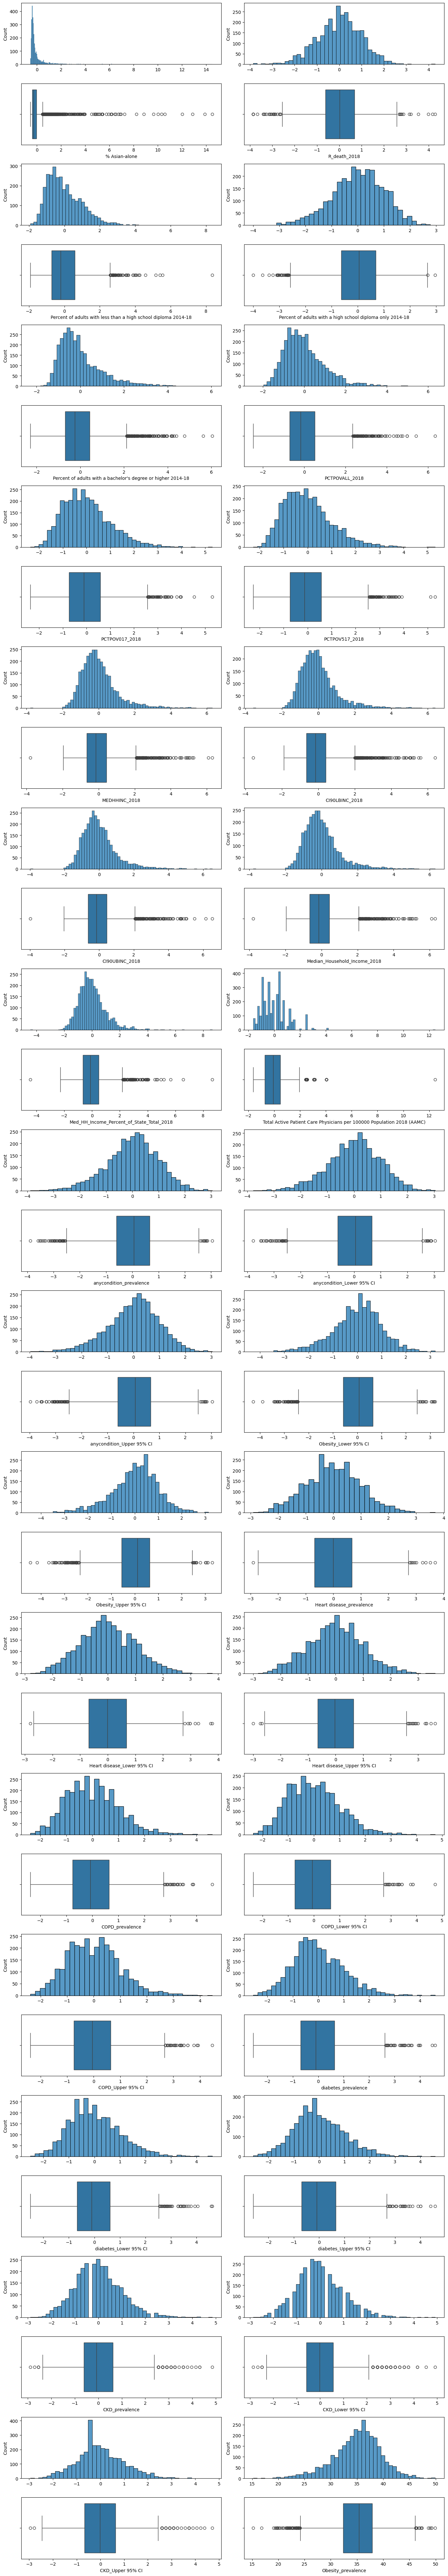

In [77]:
# Univariate Data Analysis

# Numerical Univariate Analysis:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# List of column names from your dataset

column_names = combo_data.columns

# Create the subplots with custom height ratios

fig, axis = plt.subplots(32, 2 , figsize=(14, 80))


# Iterate through each column and plot histograms and box plots

for i, col_name in enumerate(column_names):
    if i % 2 == 0 :
        sns.histplot(ax = axis[i, 0], data = combo_data, x = col_name).set(xlabel=None)
        sns.boxplot(ax = axis[i + 1, 0 ], data = combo_data, x = col_name)
    else :
        sns.histplot(ax=axis[i - 1, 1], data = combo_data, x = col_name).set(xlabel=None)
        sns.boxplot(ax=axis[i , 1 ], data = combo_data, x = col_name)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

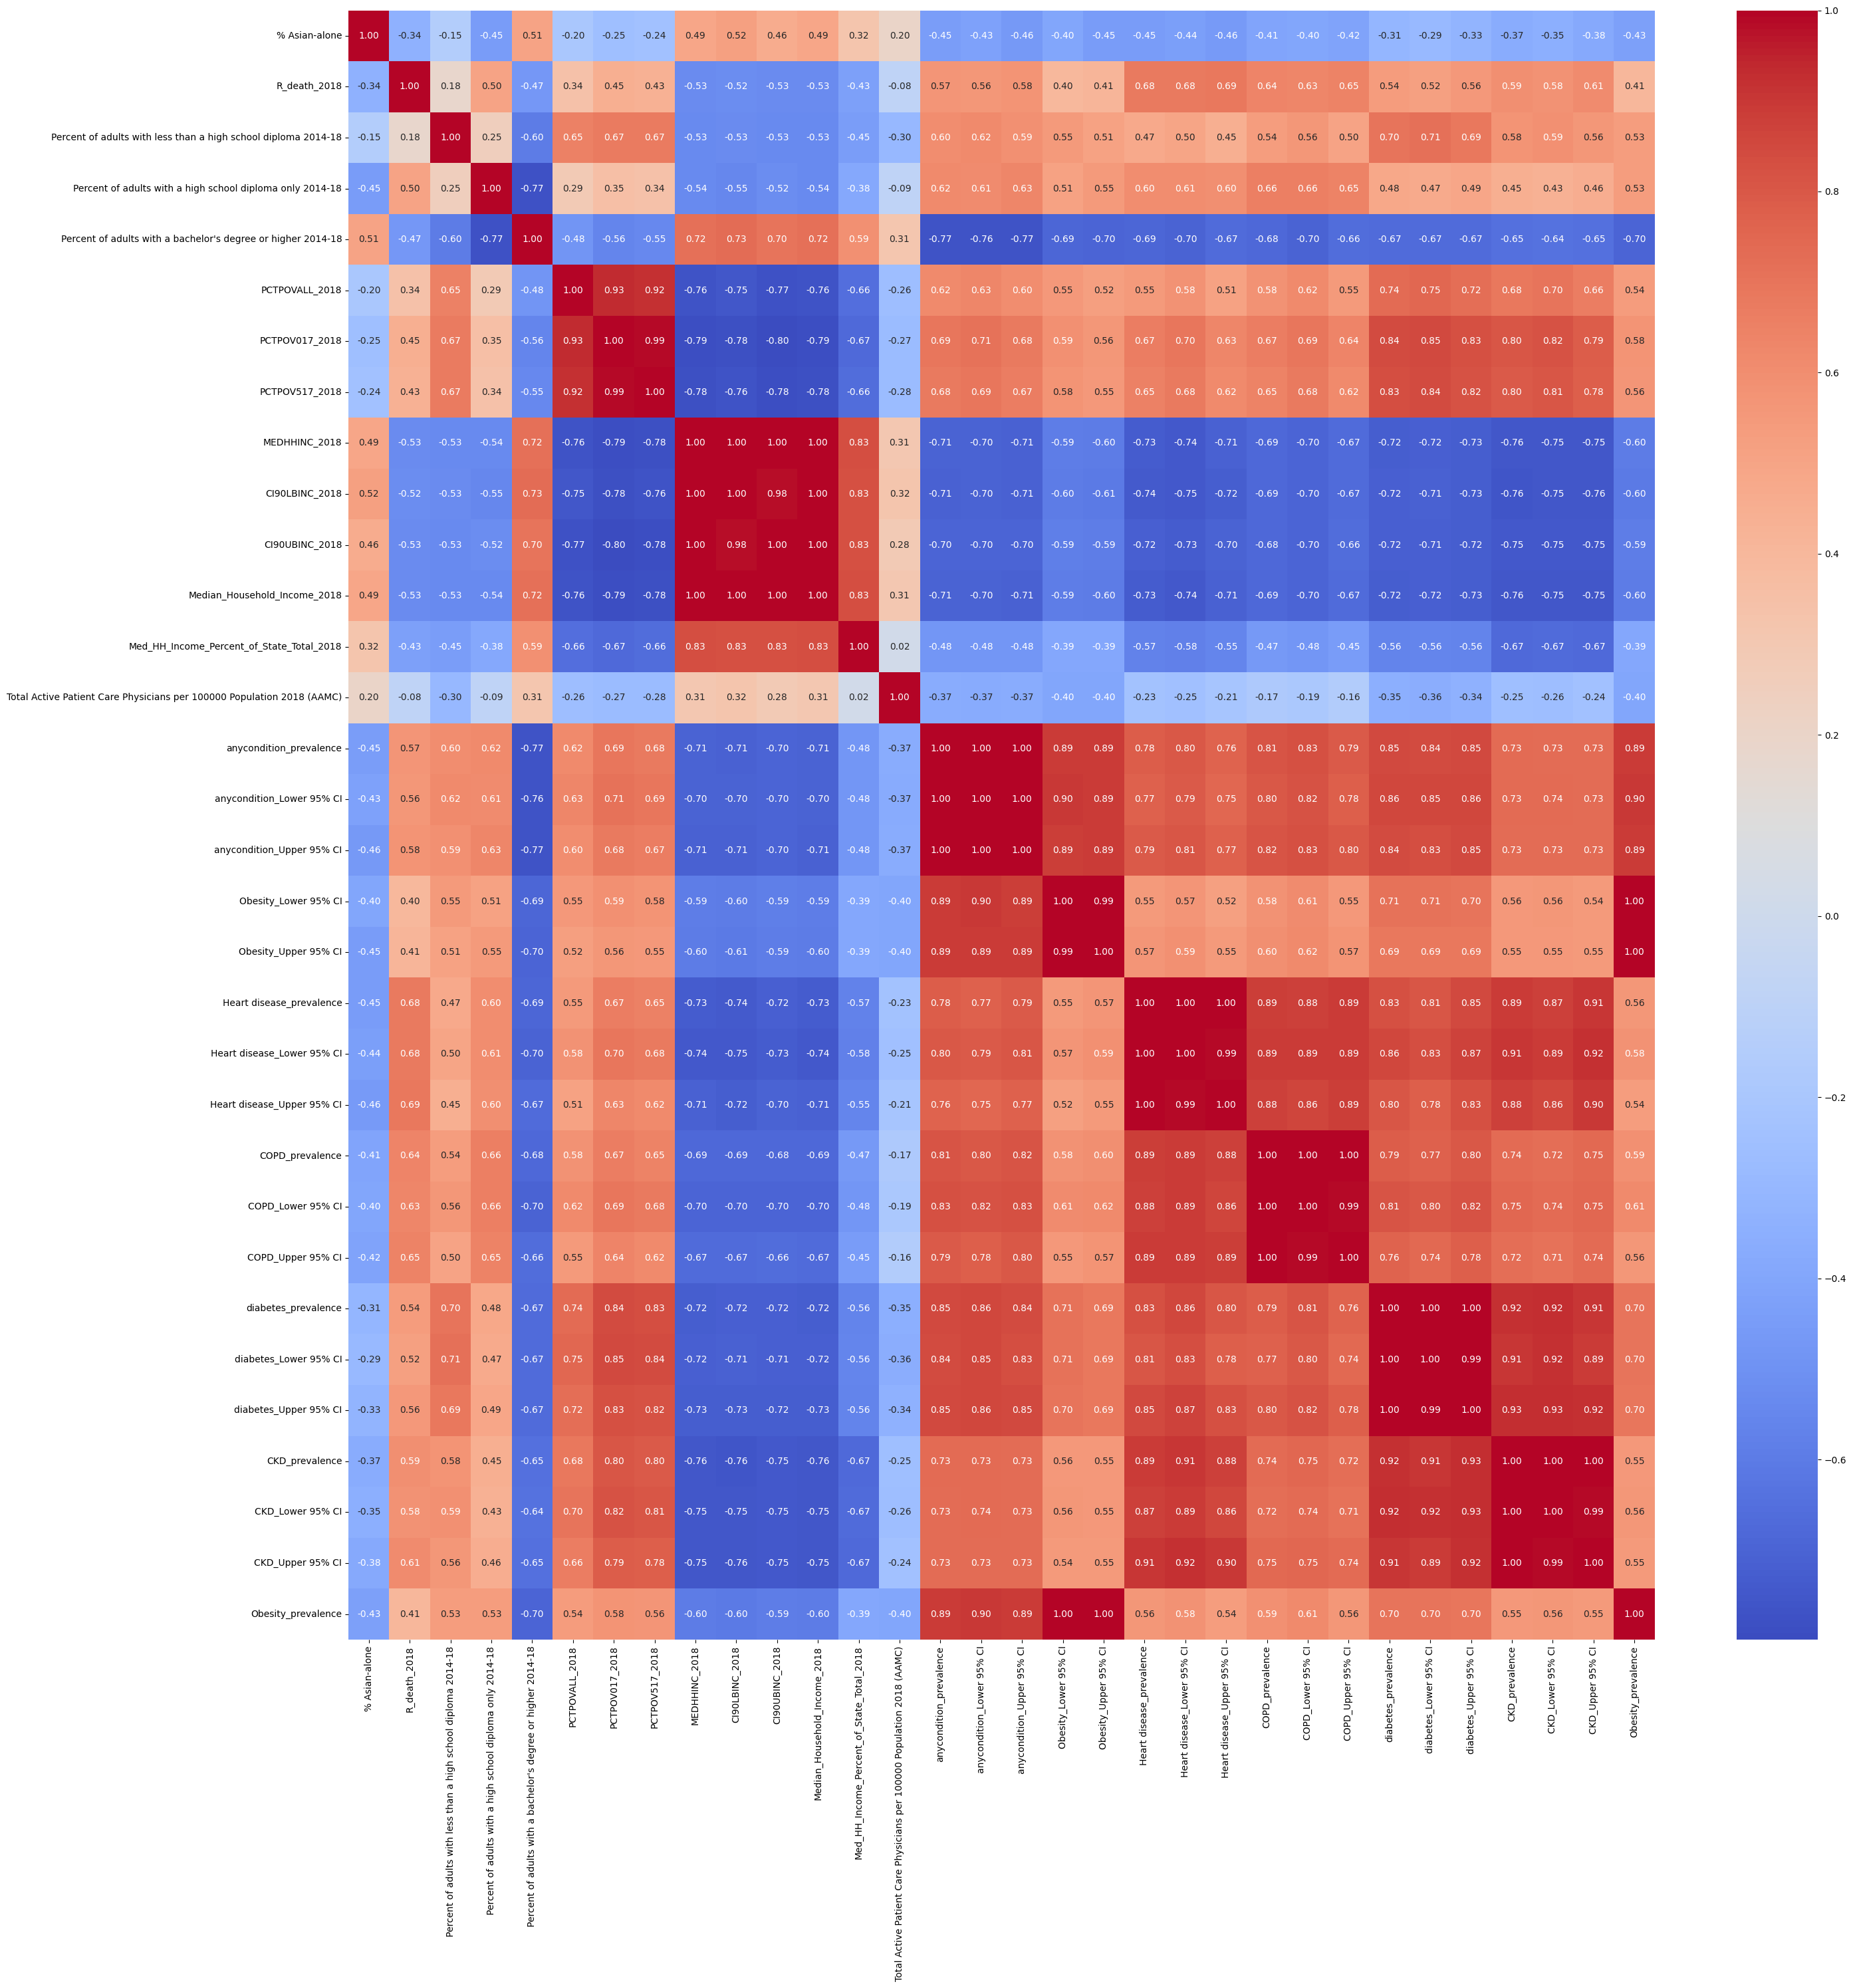

In [78]:
# Heat Map:

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix

corr_matrix = combo_data.corr()

fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", ax=ax)

plt.tight_layout()

plt.show()

- There are many strong correlations in the dataset.

In [79]:
# Null Values:

combo_data.isnull().sum().sort_values(ascending=False)

% Asian-alone                                                             0
R_death_2018                                                              0
CKD_Upper 95% CI                                                          0
CKD_Lower 95% CI                                                          0
CKD_prevalence                                                            0
diabetes_Upper 95% CI                                                     0
diabetes_Lower 95% CI                                                     0
diabetes_prevalence                                                       0
COPD_Upper 95% CI                                                         0
COPD_Lower 95% CI                                                         0
COPD_prevalence                                                           0
Heart disease_Upper 95% CI                                                0
Heart disease_Lower 95% CI                                                0
Heart diseas

- No nulls found.

#### Linear Regression Model:

In [80]:
# We divide the dataset into training and test samples

X = combo_data.drop('Obesity_prevalence', axis = 1)
y = combo_data['Obesity_prevalence']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [81]:
# KBest Selection for the best Features

from sklearn.feature_selection import SelectKBest, f_regression

selection_model = SelectKBest(f_regression, k = 10)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,Percent of adults with a bachelor's degree or higher 2014-18,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,Obesity_Lower 95% CI,Obesity_Upper 95% CI,COPD_Lower 95% CI,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI
0,1.964087,-0.641838,-0.637191,-0.648577,0.446677,0.394395,-1.789063,-1.862576,-1.787620,-1.895542
1,1.031174,-1.033783,-1.014030,-1.024682,-1.121488,-1.222259,-0.304203,-0.394103,-0.414900,-0.337677
2,2.112505,-2.005809,-2.003232,-1.980616,-2.308812,-2.314593,-1.166379,-1.568881,-1.558834,-1.506075
3,0.151268,-0.375314,-0.370263,-0.413511,0.961931,0.896869,-1.741164,-1.385322,-1.330047,-1.470669
4,0.819149,-0.265570,-0.260352,-0.272472,0.581091,0.503629,-1.453772,-1.018204,-1.024998,-1.010391


In [82]:
X_train_sel['Obesity_prevalence'] = list(y_train)
X_test_sel['Obesity_prevalence'] = list(y_test)
X_train_sel.to_csv('/workspaces/machine-learning-regularized-linear-regression-Juli-MM/data/processed/clean_train-health-data.csv', index=False)
X_test_sel.to_csv('/workspaces/machine-learning-regularized-linear-regression-Juli-MM/data/processed/clean_test-health-data.csv', index=False)

In [83]:
# Import cleanned data

train_data = pd.read_csv('/workspaces/machine-learning-regularized-linear-regression-Juli-MM/data/processed/clean_train-health-data.csv')
test_data = pd.read_csv('/workspaces/machine-learning-regularized-linear-regression-Juli-MM/data/processed/clean_test-health-data.csv')

train_data.head()

,Percent of adults with a bachelor's degree or higher 2014-18,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,Obesity_Lower 95% CI,Obesity_Upper 95% CI,COPD_Lower 95% CI,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,Obesity_prevalence
0,1.964087,-0.641838,-0.637191,-0.648577,0.446677,0.394395,-1.789063,-1.862576,-1.787620,-1.895542,37.0
1,1.031174,-1.033783,-1.014030,-1.024682,-1.121488,-1.222259,-0.304203,-0.394103,-0.414900,-0.337677,29.7
2,2.112505,-2.005809,-2.003232,-1.980616,-2.308812,-2.314593,-1.166379,-1.568881,-1.558834,-1.506075,24.5
3,0.151268,-0.375314,-0.370263,-0.413511,0.961931,0.896869,-1.741164,-1.385322,-1.330047,-1.470669,39.2
4,0.819149,-0.265570,-0.260352,-0.272472,0.581091,0.503629,-1.453772,-1.018204,-1.024998,-1.010391,37.5


In [84]:
X_train = train_data.drop(['Obesity_prevalence'], axis = 1)
y_train = train_data['Obesity_prevalence']
X_test = test_data.drop(['Obesity_prevalence'], axis = 1)
y_test = test_data['Obesity_prevalence']

In [85]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [86]:
# Parameter Fitting

print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b1..., b10): {model.coef_}")

Intercept (a): 35.01908670063776
Coefficients (b1..., b10): [-2.60765257e-03  2.22447791e-01 -4.20071832e-02 -1.80121647e-01
  2.23204333e+00  2.29339357e+00 -1.92793996e-03  2.58470056e-02
 -8.80819500e-02  5.97756665e-02]


In [87]:
# Predict target values on the test data

y_pred = model.predict(X_test)

In [88]:
# Test The Model Accuracy

from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean squared error (MSE): {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination (R-squared): {r2_score(y_test, y_pred)}")

Mean squared error (MSE): 0.0033015877057000795
Coefficient of determination (R-squared): 0.9998346230843741


#### Model Optimization - Lasso:

In [92]:
from sklearn.linear_model import Lasso

alpha = 0.001
lasso_model = Lasso(alpha = alpha)

# Tranning the model:

lasso_model.fit(X_train, y_train)

# # Predict target values on the test data

selected_features = X_train.columns[lasso_model.coef_ != 0]

y_pred = lasso_model.predict(X_test)

# Test The Model Accuracy:

score = lasso_model.score(X_test, y_test)
print(f"Selected Features: {selected_features}")
print("Coefficients:", lasso_model.coef_)
print(f"Mean squared error (MSE): {mean_squared_error(y_test, y_pred)}")
print("Coefficient of determination (R-squared)", score)

Selected Features: Index(['Percent of adults with a bachelor's degree or higher 2014-18',
       'Obesity_Lower 95% CI', 'Obesity_Upper 95% CI'],
      dtype='object')
Coefficients: [-8.82626283e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.24105694e+00  2.28219776e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00]
Mean squared error (MSE): 0.0032995518034783485
Coefficient of determination (R-squared) 0.9998347250629553


In [93]:
# Save model

import joblib

filename = 'linear_regression_model.pkl'
joblib.dump(model, filename)


['linear_regression_model.pkl']